# Adult Salary Prediction

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
df=pd.read_csv('adult_data.csv')

In [3]:
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [4]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## EDA

In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [9]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
categorical_features=[feature for feature in df.columns if feature not in numerical_features]

In [10]:
numerical_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [11]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [12]:
discrete_features

['education_num']

In [13]:
continuous_features

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [14]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

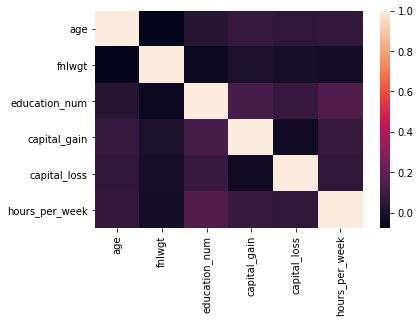

In [15]:
sns.heatmap(df.corr())

## Feature Engineering

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

### Handling Outliers

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


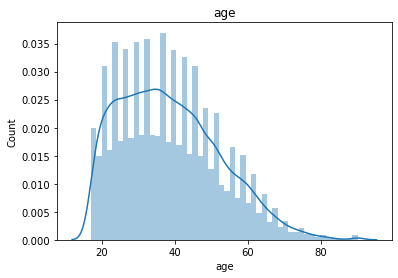

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


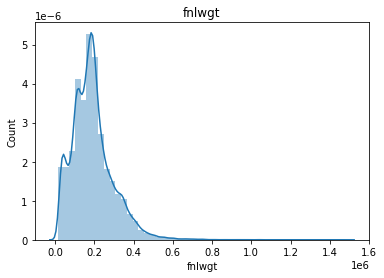

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


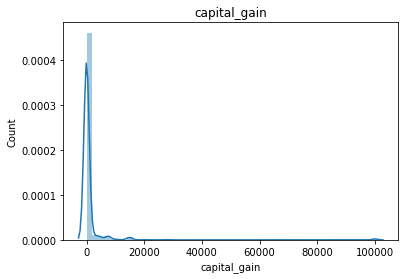

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


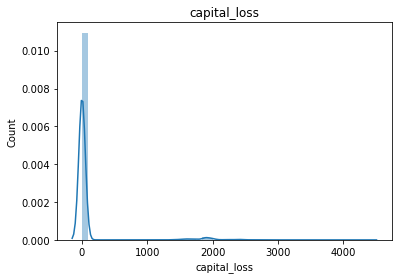

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


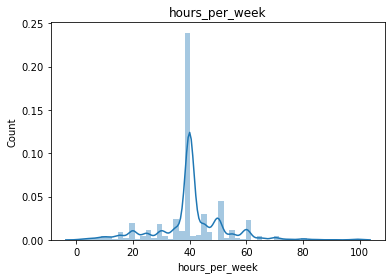

In [17]:
for feature in continuous_features:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


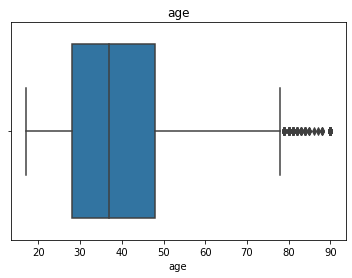

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


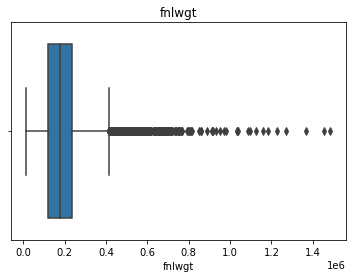

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


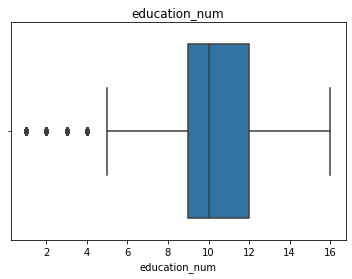

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


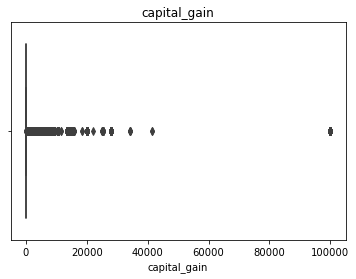

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


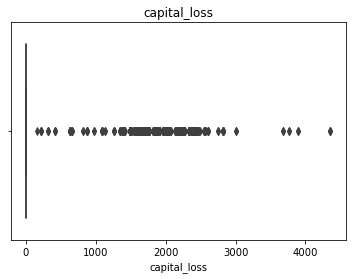

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


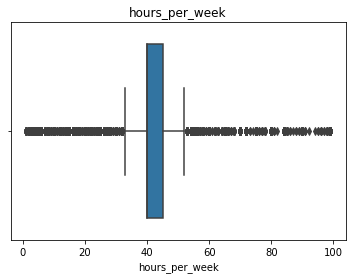

<Figure size 1080x1080 with 0 Axes>

In [18]:
for feature in numerical_features:
    data=df.copy()
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [19]:
for feature in numerical_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


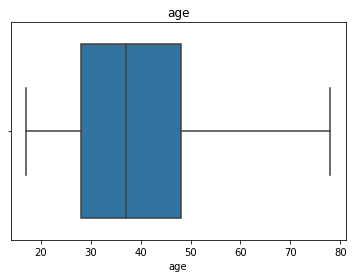

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


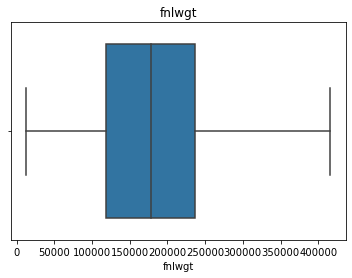

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


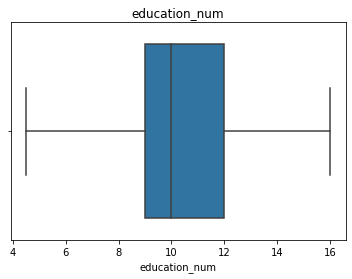

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


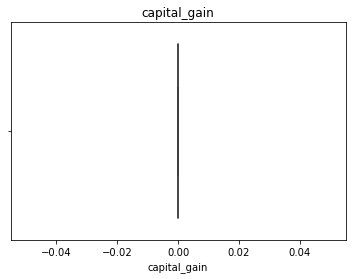

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


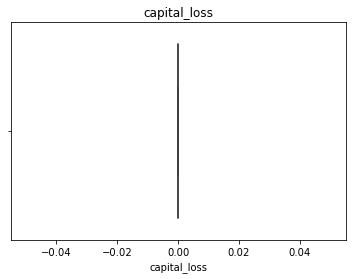

<Figure size 1080x1080 with 0 Axes>

C:\Users\sykum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


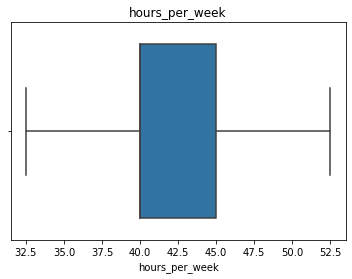

<Figure size 1080x1080 with 0 Axes>

In [20]:
for feature in numerical_features:
    data=df.copy()
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

### Encoding Categorical Variables

In [21]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [22]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is workclass and number of categories are 9
The feature is education and number of categories are 16
The feature is marital_status and number of categories are 7
The feature is occupation and number of categories are 15
The feature is relationship and number of categories are 6
The feature is race and number of categories are 5
The feature is sex and number of categories are 2
The feature is native_country and number of categories are 42
The feature is salary and number of categories are 2


In [23]:
df['sex'] = np.where(df['sex'] == " Male", 1, 0)

In [24]:
race_enco = {value: key for key, value in enumerate(df['race'].unique())}
df['race'] = df['race'].map(race_enco)

In [25]:
relation_enco = {value: key for key, value in enumerate(df['relationship'].unique())}
df['relationship'] = df['relationship'].map(relation_enco)

In [26]:
df['native_country'] = np.where(df['native_country'] == ' ?', 'Missing', df['native_country'])
native_enco = {value: key for key, value in enumerate(df['native_country'].unique())}
df['native_country'] = df['native_country'].map(native_enco)

In [27]:
df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
workclass_enco = {value: key for key, value in enumerate(df['workclass'].unique())}
df['workclass'] = df['workclass'].map(workclass_enco)

In [28]:
education_enco = {value: key for key, value in enumerate(df['education'].unique())}
df['education'] = df['education'].map(education_enco)

In [29]:
df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
occupation_enco = {value: key for key, value in enumerate(df['occupation'].unique())}
df['occupation'] = df['occupation'].map(occupation_enco)

In [30]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [31]:
df['salary'] = df['salary'].replace(' >50K', '>50K')
df['salary'] = np.where(df['salary'] > '50K', 1, 0)

In [32]:
marital_status_enco = {value: key for key, value in enumerate(df['marital_status'].unique())}
df['marital_status'] = df['marital_status'].map(marital_status_enco)

In [33]:
df.drop('fnlwgt',axis=1,inplace=True)

In [34]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,1,0,0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,1,0,0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,1,0,0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,1,0,0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0,0,40.0,1,0


## Splitting the dataset into train and test set

In [36]:
x=df.drop('salary',axis=1)
y=df['salary']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)

In [41]:
xtest=scaler.transform(xtest)

## Using Logistic Regression Model 

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)

In [43]:
model.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [44]:
ypred=model.predict(xtest)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.800706279748196
[[4571  347]
 [ 951  644]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4918
           1       0.65      0.40      0.50      1595

    accuracy                           0.80      6513
   macro avg       0.74      0.67      0.69      6513
weighted avg       0.78      0.80      0.78      6513

